In [2]:
import xarray as xr


In [3]:
newvalue_future = xr.open_dataset(f"/storage/scratch/users/ch21o450/data/SR/SR_CC_65_rcp60.nc", decode_times=False).to_array().isel(variable=0)

In [41]:
south_africa_gdf = shp[shp['new_region'] == 'Eastern Europe']

minx, miny, maxx, maxy = south_africa_gdf.geometry.total_bounds

# Use the bounding box to create a boolean mask
mask = (
    (newvalue_future.lon >= minx) & (newvalue_future.lon <= maxx) &
    (newvalue_future.lat >= miny) & (newvalue_future.lat <= maxy)
)

# Apply the mask to the DataArray
region_data = newvalue_future.where(mask)

# Calculate mean species richness
mean_species_richness = region_data.mean(dim=['lat', 'lon']).item()

print(f"Mean species richness for Sub-saharan Africa: {mean_species_richness}")


Mean species richness for Sub-saharan Africa: 384.9616142381811


<Axes: >

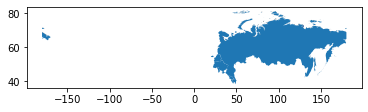

In [42]:
south_africa_gdf.plot()

In [4]:
import xarray as xr
import geopandas as gpd

# Read the shapefile
shp_dir = "/storage/workspaces/wa_climate/climate_trt/chari/IPBES_subregions/IPBES_Regions_Subregions2.shp"
shp = gpd.read_file(shp_dir)

# Define the region mapping
region_mapping = {
    'Caribbean': 'North America',  # Corrected typo in 'Caribbean'
    'Central Africa': 'Sub-saharan Africa',
    'Central and Western Europe': 'Central and Western Europe',
    'Central Asia': 'Central Asia',
    'East Africa and adjacent islands': 'Sub-saharan Africa',
    'Eastern Europe': 'Eastern Europe',
    'Mesoamerica': 'North America',
    'North Africa': 'North Africa',
    'North America': 'North America',
    'North-East Asia': 'North-East Asia',  # Corrected typo in 'Nort-East Asia'
    'Oceania': 'Oceania',
    'South America': 'South America',
    'South Asia': 'South Asia',
    'South-East Asia': 'South-East Asia',
    'Southern Africa': 'Sub-saharan Africa',
    'West Africa': 'Sub-saharan Africa',
    'Western Asia': 'Western Asia'
}

# Create the new_region column in the shapefile
shp['new_region'] = shp['Sub_Region'].map(region_mapping)

#

In [43]:
# Create an empty dictionary to store mean species richness for each region
mean_species_richness_dict = {}

# Iterate through unique new regions
for new_region in shp['new_region'].unique():
    # Select the region-specific geometry from the shapefile
    region_gdf = shp[shp['new_region'] == new_region]

    # Extract the bounding box coordinates
    minx, miny, maxx, maxy = region_gdf.geometry.total_bounds

    # Create a boolean mask based on the bounding box

    mask = (
    (newvalue_future.lon >= minx) & (newvalue_future.lon <= maxx) &
    (newvalue_future.lat >= miny) & (newvalue_future.lat <= maxy)
)


    # Apply the mask to the DataArray
    region_data = newvalue_future.where(mask)

    # Calculate mean species richness
    mean_species_richness = region_data.mean(dim=['lat', 'lon']).item()

    # Store the result in the dictionary
    mean_species_richness_dict[new_region] = mean_species_richness

# Print the results
for new_region, mean_species_richness in mean_species_richness_dict.items():
    print(f"Mean species richness for {new_region}: {mean_species_richness}")


Mean species richness for North America: 397.1754118102095
Mean species richness for South Asia: 386.72810866153617
Mean species richness for Sub-saharan Africa: 496.24569039010066
Mean species richness for Central and Western Europe: 449.18380134781074
Mean species richness for Western Asia: 322.62977467391414
Mean species richness for South America: 609.2164085565274
Mean species richness for Eastern Europe: 384.9616142381811
Mean species richness for Oceania: 511.1333014880478
Mean species richness for nan: nan
Mean species richness for South-East Asia: 581.7981134880754
Mean species richness for North-East Asia: 430.46799909845254
Mean species richness for North Africa: 326.9389902135099
Mean species richness for Central Asia: 355.5959023389769


In [45]:
# Create an empty dictionary to store mean species richness for each region
mean_species_richness_dict = {}

# Iterate through unique new regions
for new_region in shp['new_region'].unique():
    # Select the region-specific geometry from the shapefile
    region_gdf = shp[shp['new_region'] == new_region]

    # Extract the bounding box coordinates
    minx, miny, maxx, maxy = region_gdf.geometry.total_bounds

    # Create a boolean mask based on the bounding box
    mask = (
        (newvalue_future.lon >= minx) & (newvalue_future.lon <= maxx) &
        (newvalue_future.lat >= miny) & (newvalue_future.lat <= maxy)
    )

    # Apply the mask to the DataArray
    region_data = newvalue_future.where(mask)

    # Calculate mean species richness
    mean_species_richness = region_data.mean(dim=['lat', 'lon']).item()

    # Store the result in the dictionary
    mean_species_richness_dict[new_region] = mean_species_richness

# Print the results
for new_region, mean_species_richness in mean_species_richness_dict.items():
    print(f"Mean species richness for {new_region}: {mean_species_richness}")


Mean species richness for North America: 397.1754118102095
Mean species richness for South Asia: 386.72810866153617
Mean species richness for Sub-saharan Africa: 496.24569039010066
Mean species richness for Central and Western Europe: 449.18380134781074
Mean species richness for Western Asia: 322.62977467391414
Mean species richness for South America: 609.2164085565274
Mean species richness for Eastern Europe: 384.9616142381811
Mean species richness for Oceania: 511.1333014880478
Mean species richness for nan: nan
Mean species richness for South-East Asia: 581.7981134880754
Mean species richness for North-East Asia: 430.46799909845254
Mean species richness for North Africa: 326.9389902135099
Mean species richness for Central Asia: 355.5959023389769


In [46]:
import pandas as pd

# Create an empty dictionary to store mean species richness for each region
mean_species_richness_dict = {}

# Iterate through unique new regions
for new_region in shp['new_region'].unique():
    # Select the region-specific geometry from the shapefile
    region_gdf = shp[shp['new_region'] == new_region]

    # Extract the bounding box coordinates
    minx, miny, maxx, maxy = region_gdf.geometry.total_bounds

    # Create a boolean mask based on the bounding box
    mask = (
        (newvalue_future.lon >= minx) & (newvalue_future.lon <= maxx) &
        (newvalue_future.lat >= miny) & (newvalue_future.lat <= maxy)
    )

    # Apply the mask to the DataArray
    region_data = newvalue_future.where(mask)

    # Calculate mean species richness
    mean_species_richness = region_data.mean(dim=['lat', 'lon']).item()

    # Store the result in the dictionary
    mean_species_richness_dict[new_region] = mean_species_richness

# Create a DataFrame from the dictionary
result_df = pd.DataFrame(mean_species_richness_dict.items(), columns=['Region', 'Mean Species Richness'])

# Print the table
print(result_df)


                        Region  Mean Species Richness
0                North America             397.175412
1                   South Asia             386.728109
2           Sub-saharan Africa             496.245690
3   Central and Western Europe             449.183801
4                 Western Asia             322.629775
5                South America             609.216409
6               Eastern Europe             384.961614
7                      Oceania             511.133301
8                          NaN                    NaN
9              South-East Asia             581.798113
10             North-East Asia             430.467999
11                North Africa             326.938990
12                Central Asia             355.595902


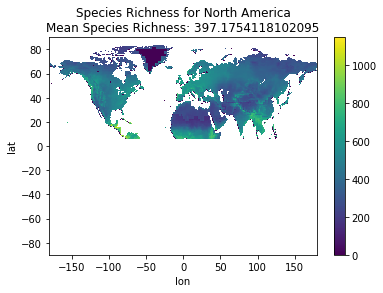

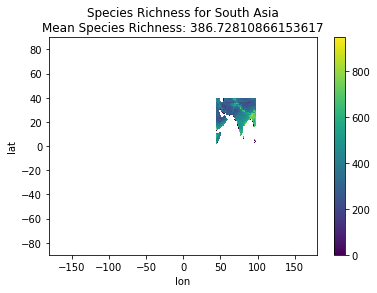

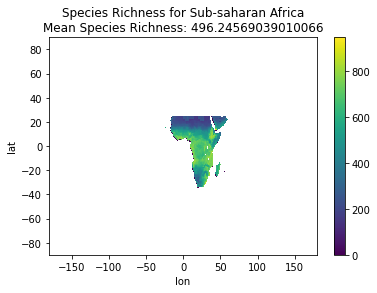

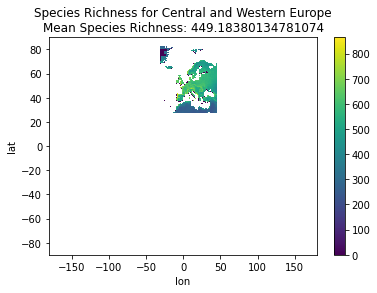

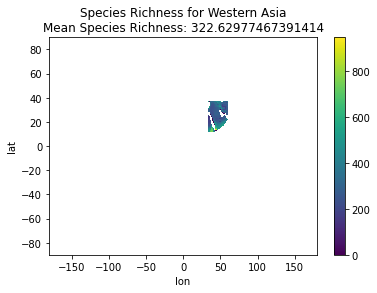

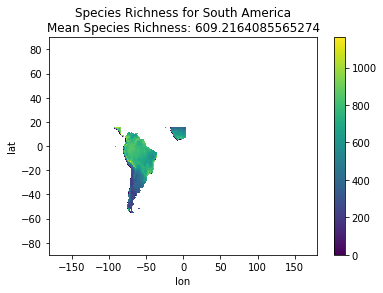

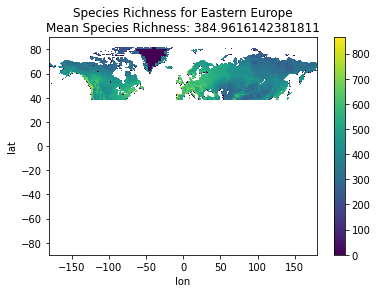

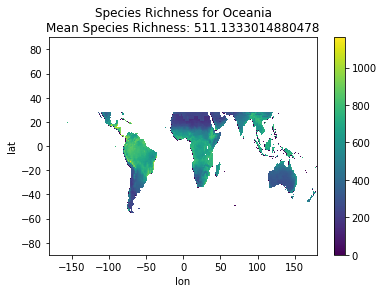

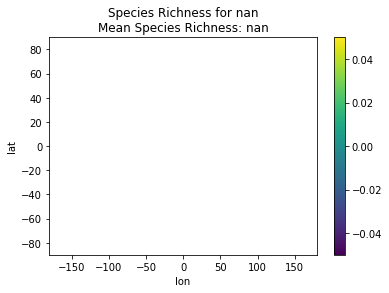

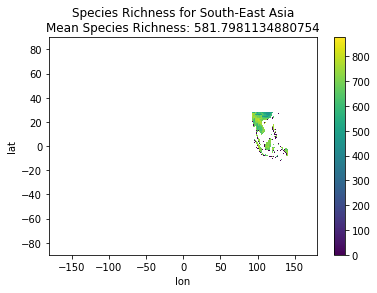

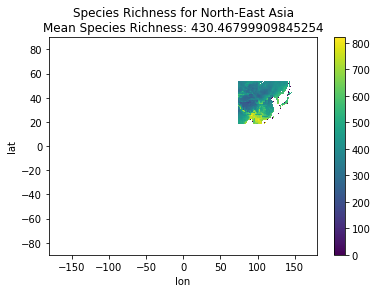

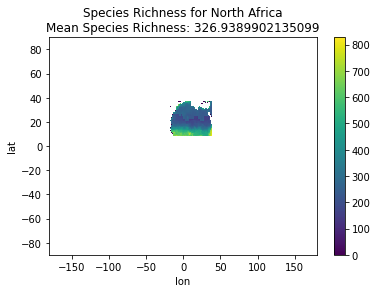

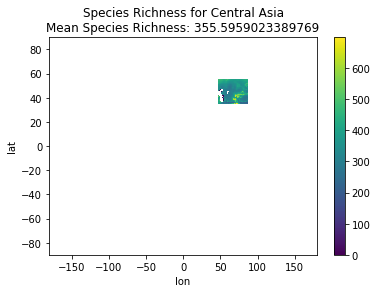

In [44]:
import matplotlib.pyplot as plt

# Loop through all new regions
for new_region in shp['new_region'].unique():
    # Filter the shapefile for the current region
    region_gdf = shp[shp['new_region'] == new_region]

    # Get the bounding box of the region
    minx, miny, maxx, maxy = region_gdf.geometry.total_bounds

        # Create a boolean mask based on the bounding box
    mask = (
        (newvalue_future.lon >= minx) & (newvalue_future.lon <= maxx) &
        (newvalue_future.lat >= miny) & (newvalue_future.lat <= maxy)
    )


    # Apply the mask to the DataArray
    region_data = newvalue_future.where(mask)

    # Calculate mean species richness
    mean_species_richness = region_data.mean(dim=['lat', 'lon']).item()

    # Plot the region
    plt.figure()
    region_data.plot()
    plt.title(f"Species Richness for {new_region}\nMean Species Richness: {mean_species_richness}")
    plt.show()


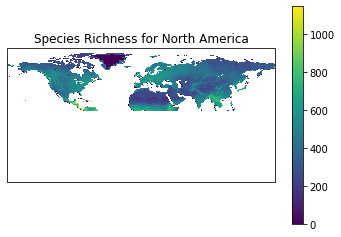

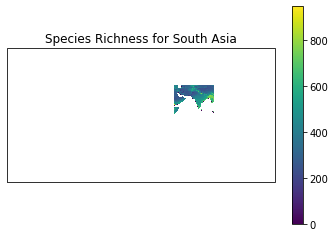

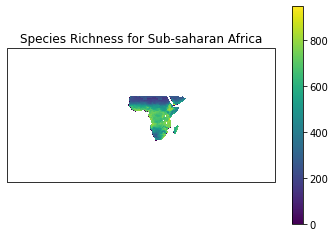

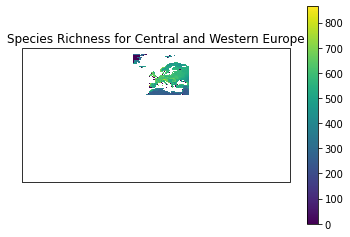

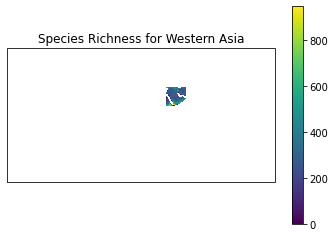

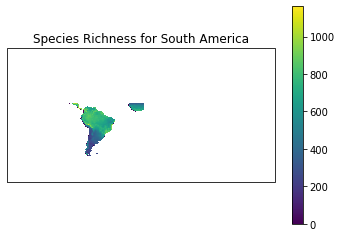

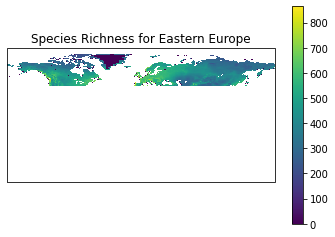

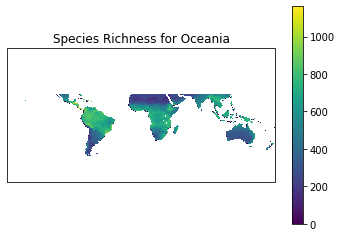

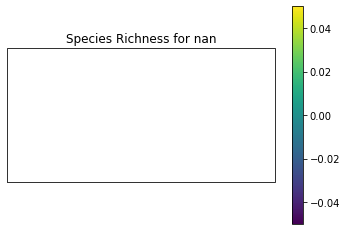

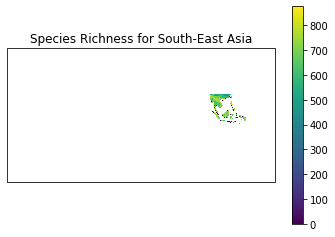

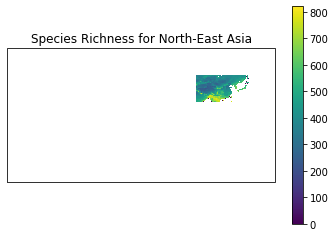

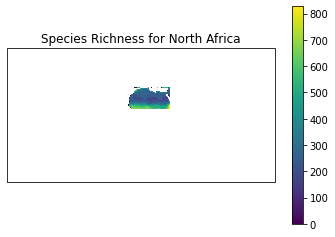

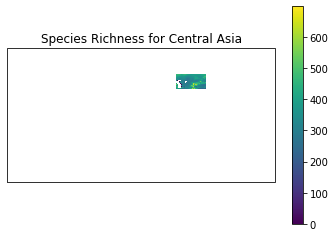

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Assume newvalue_future is an xarray DataArray
# ...

# Loop through all new regions
for new_region in shp['new_region'].unique():
    # Filter the shapefile for the current region
    region_gdf = shp[shp['new_region'] == new_region]

    # Get the bounding box of the region
    minx, miny, maxx, maxy = region_gdf.geometry.total_bounds

    # Create a boolean mask based on the bounding box
    mask = (
        (newvalue_future.lon >= minx) & (newvalue_future.lon <= maxx) &
        (newvalue_future.lat >= miny) & (newvalue_future.lat <= maxy)
    )

    # Apply the mask to the DataArray
    region_data = newvalue_future.where(mask)

    # Plot the region
    plt.figure()
    
    # Explicitly set the projection to match the NetCDF data
    ax = plt.axes(projection=ccrs.PlateCarree())
    region_data.plot(ax=ax, transform=ccrs.PlateCarree())
    
    plt.title(f"Species Richness for {new_region}")
    plt.show()


<Axes: >

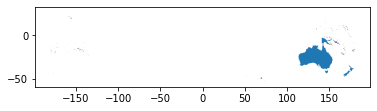

In [30]:
oc.plot()

In [11]:
shp['Sub_Region'] == 'Oceania' 

0      False
1      False
2      False
3      False
4      False
       ...  
252    False
253    False
254     True
255    False
256     True
Name: Sub_Region, Length: 257, dtype: bool

In [21]:
north_america_gdf = shp[shp['new_region'] == 'North America']
eastern_europe_gdf = shp[shp['new_region'] == 'Eastern Europe']

print("North America Bounding Box:", north_america_gdf.geometry.total_bounds)
print("Eastern Europe Bounding Box:", eastern_europe_gdf.geometry.total_bounds)


North America Bounding Box: [-179.15055847    5.49902678  179.77340698   83.65833282]
Eastern Europe Bounding Box: [-180.           38.39704514  180.           81.85624695]


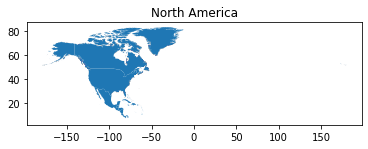

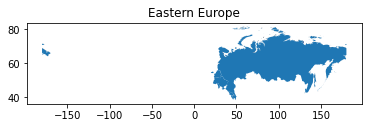

In [24]:
north_america_gdf.plot()
plt.title("North America")
plt.show()

eastern_europe_gdf.plot()
plt.title("Eastern Europe")
plt.show()
